In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("MUMBAI.csv")

/var/folders/kt/q0sjjgn94nz3_lf77pxkgr6h0000gn/T/ipykernel_4046/942647379.py:1: DtypeWarning: Columns (12,18,19,22,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("MUMBAI.csv")


INDEX : Index No. of the station

MN    : Month

HR    : Hour Code

DT    : Date

SLP   : Station Level Pressure hpa

MSLP  : Mean Sea Level Pressure hpa

DBT   : Dry bulb Temperature oC

WBT   : Wet bulb Temperature oC

DPT   : Dew point Temperature oC

RH    : Relative Humidity in %, i.e. 090 means 90 %.

VP    : Vapour Pressure in hpa

DD    : Wind Direction in 16 points of compass

FFF   : Wind Speed in Km. per hour

AW    : Average Wind speed

VV    : Visibility

Cl    : Form of Low cloud 

A     : Amount of Low cloud 

Cm    : Form of Medium cloud

A.1   : Amount of Medium cloud 

Ch    : Form of High Cloud

A.2   : Amount of High cloud

Dl    : Direction of low cloud in 8 points of compass (in code)

Dm    : Direction of medium cloud in 8 points of compass (in code)

Dh    : Direction of high cloud in 8 points of compass (in code)

TC    : Total amount of cloud (in oktas)

h     : Height of low cloud

c     : Form of individual Layer of cloud

a     : Amount of individual Layer of cloud

Ht    : Height of individual Layer of cloud (in code)

RF    : Total Rainfall since previous observation in mm

EVP   : Total Evaporation in mm

DW    : Direction of Wave in 16 points of compass (in code)

P     : Period of wave (in code)

H     : Height of wave (in code)

WAT   : Water Temperature in degree C
   

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28225 entries, 0 to 28224
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        28225 non-null  int64  
 1   YEAR         28225 non-null  int64  
 2   MN           28225 non-null  int64  
 3   HR           28225 non-null  int64  
 4   DT           28225 non-null  int64  
 5   SLP          28225 non-null  float64
 6   MSLP         28225 non-null  float64
 7   DBT          28225 non-null  float64
 8   WBT          28225 non-null  float64
 9   DPT          28225 non-null  float64
 10  RH           28225 non-null  int64  
 11  VP           28225 non-null  object 
 12  DD           28225 non-null  object 
 13  FFF          28225 non-null  object 
 14  AW           28225 non-null  object 
 15  VV           28225 non-null  object 
 16  Cl           28225 non-null  int64  
 17  A            28225 non-null  int64  
 18  Cm           28225 non-null  object 
 19  A.1 

In [4]:
df=df.iloc[:,:-2]
df=df.apply(pd.to_numeric,errors='coerce')

In [5]:
df.dtypes

INDEX      int64
YEAR       int64
MN         int64
HR         int64
DT         int64
SLP      float64
MSLP     float64
DBT      float64
WBT      float64
DPT      float64
RH         int64
VP       float64
DD       float64
FFF      float64
AW       float64
VV       float64
Cl         int64
A          int64
Cm       float64
A.1      float64
Ch       float64
A.2      float64
Dl       float64
Dm       float64
Dh       float64
TC       float64
h        float64
c        float64
a          int64
Ht       float64
RF       float64
EVP      float64
dtype: object

In [6]:
df.isnull().sum()

INDEX        0
YEAR         0
MN           0
HR           0
DT           0
SLP          0
MSLP         0
DBT          0
WBT          0
DPT          0
RH           0
VP           4
DD           1
FFF          4
AW       21126
VV          12
Cl           0
A            0
Cm           1
A.1          1
Ch        2463
A.2       2461
Dl           2
Dm           9
Dh        2432
TC           5
h            1
c            3
a            0
Ht           3
RF           2
EVP          2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28225 entries, 0 to 28224
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INDEX   28225 non-null  int64  
 1   YEAR    28225 non-null  int64  
 2   MN      28225 non-null  int64  
 3   HR      28225 non-null  int64  
 4   DT      28225 non-null  int64  
 5   SLP     28225 non-null  float64
 6   MSLP    28225 non-null  float64
 7   DBT     28225 non-null  float64
 8   WBT     28225 non-null  float64
 9   DPT     28225 non-null  float64
 10  RH      28225 non-null  int64  
 11  VP      28221 non-null  float64
 12  DD      28224 non-null  float64
 13  FFF     28221 non-null  float64
 14  AW      7099 non-null   float64
 15  VV      28213 non-null  float64
 16  Cl      28225 non-null  int64  
 17  A       28225 non-null  int64  
 18  Cm      28224 non-null  float64
 19  A.1     28224 non-null  float64
 20  Ch      25762 non-null  float64
 21  A.2     25764 non-null  float64
 22

In [8]:
# As avg wind speed is missing for 21126 columns 
df[['AW','FFF']].corr()
# So correlation is moderate and 75% of AW data is missing let's drop it.
df.drop(["AW"], axis=1,inplace=True)
df.head()

,INDEX,YEAR,MN,HR,DT,SLP,MSLP,DBT,WBT,DPT,...,Dl,Dm,Dh,TC,h,c,a,Ht,RF,EVP
0,43003,2010,1,0,1,1008.4,1010.1,21.2,17.4,14.8,...,0.0,0.0,0.0,0.0,9.0,0.0,900,0.0,0.0,99.0
1,43003,2010,1,0,2,1009.5,1011.2,22.0,19.4,17.8,...,0.0,0.0,0.0,0.0,9.0,0.0,900,0.0,0.0,99.0
2,43003,2010,1,0,3,1011.5,1013.2,24.0,21.4,20.0,...,9.0,0.0,0.0,1.0,5.0,6.0,561,6.0,1.0,20.0
3,43003,2010,1,0,4,1012.0,1013.7,22.4,18.6,16.1,...,0.0,0.0,0.0,0.0,9.0,0.0,900,0.0,0.0,99.0
4,43003,2010,1,0,5,1009.3,1011.0,19.4,18.4,17.8,...,0.0,0.0,0.0,0.0,9.0,0.0,900,0.0,0.0,99.0


In [9]:
df["HR"]=df["HR"]/4

In [10]:
print(df)

       INDEX  YEAR  MN   HR  DT     SLP    MSLP   DBT   WBT   DPT  ...   Dl  \
0      43003  2010   1  0.0   1  1008.4  1010.1  21.2  17.4  14.8  ...  0.0   
1      43003  2010   1  0.0   2  1009.5  1011.2  22.0  19.4  17.8  ...  0.0   
2      43003  2010   1  0.0   3  1011.5  1013.2  24.0  21.4  20.0  ...  9.0   
3      43003  2010   1  0.0   4  1012.0  1013.7  22.4  18.6  16.1  ...  0.0   
4      43003  2010   1  0.0   5  1009.3  1011.0  19.4  18.4  17.8  ...  0.0   
...      ...   ...  ..  ...  ..     ...     ...   ...   ...   ...  ...  ...   
28220  43003  2020  11  6.0  24  1011.5  1013.2  30.4  22.0  17.2  ...  0.0   
28221  43003  2020  12  3.0  12  1011.3  1012.9  24.8  22.6  21.5  ...  9.0   
28222  43003  2020  12  3.0  24  1011.5  1013.1  26.8  23.4  21.7  ...  9.0   
28223  43003  2020  12  6.0  12  1009.5  1011.2  19.4  16.6  14.6  ...  0.0   
28224  43003  2020  12  6.0  24  1009.9  1011.6  28.8  19.0  12.0  ...  0.0   

        Dm   Dh   TC    h    c    a   Ht   RF   EVP

In [11]:
df["YEAR"].value_counts()
# 2020 is almost 50 , so we treat it carefully but exclude while fitting in model

YEAR
2010    2907
2014    2874
2018    2872
2019    2864
2017    2862
2011    2861
2016    2793
2015    2469
2012    2168
2013    2155
2020    1400
Name: count, dtype: int64

In [12]:
df.isnull().sum()

INDEX       0
YEAR        0
MN          0
HR          0
DT          0
SLP         0
MSLP        0
DBT         0
WBT         0
DPT         0
RH          0
VP          4
DD          1
FFF         4
VV         12
Cl          0
A           0
Cm          1
A.1         1
Ch       2463
A.2      2461
Dl          2
Dm          9
Dh       2432
TC          5
h           1
c           3
a           0
Ht          3
RF          2
EVP         2
dtype: int64

In [13]:
# List of categorical columns to fill by month-wise mode
cat_cols_by_month = ['DD', 'Cm', 'A.1', 'Dl', 'Dm', 'TC', 'h', 'c', 'Ht']

# Filling each categorical column's null values using the mode of its month
for col in cat_cols_by_month:
    df[col] = df.groupby('MN')[col].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna("Unknown"))

In [14]:
df.isnull().sum()

INDEX       0
YEAR        0
MN          0
HR          0
DT          0
SLP         0
MSLP        0
DBT         0
WBT         0
DPT         0
RH          0
VP          4
DD          0
FFF         4
VV         12
Cl          0
A           0
Cm          0
A.1         0
Ch       2463
A.2      2461
Dl          0
Dm          0
Dh       2432
TC          0
h           0
c           0
a           0
Ht          0
RF          2
EVP         2
dtype: int64

In [15]:
# Fill high-null categorical columns with month-wise mode or 'Unknown'
for col in ['Ch', 'A.2', 'Dh']:
    df[col] = df.groupby('MN')[col].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna("Unknown"))

In [16]:
df.isnull().sum()

INDEX     0
YEAR      0
MN        0
HR        0
DT        0
SLP       0
MSLP      0
DBT       0
WBT       0
DPT       0
RH        0
VP        4
DD        0
FFF       4
VV       12
Cl        0
A         0
Cm        0
A.1       0
Ch        0
A.2       0
Dl        0
Dm        0
Dh        0
TC        0
h         0
c         0
a         0
Ht        0
RF        2
EVP       2
dtype: int64

In [17]:
# Fill numeric columns with median of the respective month
for col in ['VP', 'FFF', 'VV']:
    df[col] = df.groupby('MN')[col].transform(lambda x: x.fillna(x.median()))

# Fill 'DD' with mode of respective month
df['DD'] = df.groupby('MN')['DD'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna("Unknown"))

In [18]:
df.isnull().sum()

INDEX    0
YEAR     0
MN       0
HR       0
DT       0
SLP      0
MSLP     0
DBT      0
WBT      0
DPT      0
RH       0
VP       0
DD       0
FFF      0
VV       0
Cl       0
A        0
Cm       0
A.1      0
Ch       0
A.2      0
Dl       0
Dm       0
Dh       0
TC       0
h        0
c        0
a        0
Ht       0
RF       2
EVP      2
dtype: int64

In [19]:
# Fill missing values with month-wise median
df['RF'] = df.groupby('MN')['RF'].transform(lambda x: x.fillna(x.median()))
# Fill by daily median first , Beacuse it may vary day to day a lot.
df['EVP'] = df.groupby(['YEAR', 'MN', 'DT'])['EVP'].transform(lambda x: x.fillna(x.median()))

In [20]:
df.isnull().sum()

INDEX    0
YEAR     0
MN       0
HR       0
DT       0
SLP      0
MSLP     0
DBT      0
WBT      0
DPT      0
RH       0
VP       0
DD       0
FFF      0
VV       0
Cl       0
A        0
Cm       0
A.1      0
Ch       0
A.2      0
Dl       0
Dm       0
Dh       0
TC       0
h        0
c        0
a        0
Ht       0
RF       0
EVP      0
dtype: int64

In [21]:
# Removing INDEX and setime datetime as new Index
df=df.drop('INDEX',axis=1)
df['datetime']=pd.to_datetime(df[['YEAR','MN','DT','HR']].rename(columns={
    'YEAR':'year',
    'MN':'month',
    'DT':'day',
    'HR':'hour'
}),errors='coerce')

df.index = pd.to_datetime(df.index)
df = df[df['datetime'].dt.year != 2020]
df.set_index('datetime',inplace=True)

In [22]:
# Calculation of correlation with FFF
correlation_with_fff = df.corr()['FFF'].sort_values(ascending=False)
print(correlation_with_fff)

FFF     1.000000
DD      0.747580
DBT     0.471814
WBT     0.343091
A       0.272629
Cl      0.263513
TC      0.262717
Dl      0.240761
Ht      0.239736
c       0.239736
VP      0.214880
VV      0.196666
DPT     0.190694
RF      0.181164
Dm      0.172648
Cm      0.159708
A.1     0.120217
Dh      0.026649
Ch      0.025906
A.2     0.023624
HR      0.017421
DT     -0.000208
YEAR   -0.043045
MN     -0.051336
SLP    -0.184416
MSLP   -0.186047
RH     -0.221777
EVP    -0.227650
a      -0.239339
h      -0.242120
Name: FFF, dtype: float64


In [23]:
# As month,day and time don't affect fff much so drop them
df.drop(['YEAR','MN','DT','HR'],axis=1,inplace=True)

In [24]:
# Sorting the dataframe by timestamp
df = df.sort_values('datetime')

Outlier Removal

In [25]:
from scipy.stats import zscore
import numpy as np

# Step 1: Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Compute Z-scores for each numeric column
z_scores = np.abs(zscore(df[numeric_cols]))

# Step 3: Define a threshold and filter out outliers
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

In [26]:
print(df)

                        SLP    MSLP   DBT   WBT   DPT  RH    VP    DD   FFF  \
datetime                                                                      
2010-01-01 00:00:00  1008.4  1010.1  21.2  17.4  14.8  67  16.8   0.0   0.0   
2010-01-01 06:00:00  1011.1  1012.7  29.4  20.4  14.6  41  16.6   9.0   6.0   
2010-01-01 09:00:00  1007.6  1009.2  32.6  23.0  17.7  41  20.2  27.0  10.0   
2010-01-01 12:00:00  1008.0  1009.6  29.0  21.4  16.9  48  19.3  32.0  10.0   
2010-01-01 15:00:00  1010.2  1011.9  26.6  20.6  17.0  56  19.4  32.0   8.0   
...                     ...     ...   ...   ...   ...  ..   ...   ...   ...   
2019-12-31 06:00:00  1012.7  1014.3  27.2  19.2  13.8  44  15.8   0.0   0.0   
2019-12-31 12:00:00  1010.1  1011.8  25.6  18.0  12.5  44  14.5  32.0   8.0   
2019-12-31 15:00:00  1011.5  1013.2  21.8  16.4  12.3  55  14.3   0.0   0.0   
2019-12-31 18:00:00  1012.0  1013.7  18.6  15.0  12.1  66  14.1   0.0   0.0   
2019-12-31 21:00:00  1010.7  1012.4  21.6  19.2  17.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22558 entries, 2010-01-01 00:00:00 to 2019-12-31 21:00:00
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SLP     22558 non-null  float64
 1   MSLP    22558 non-null  float64
 2   DBT     22558 non-null  float64
 3   WBT     22558 non-null  float64
 4   DPT     22558 non-null  float64
 5   RH      22558 non-null  int64  
 6   VP      22558 non-null  float64
 7   DD      22558 non-null  float64
 8   FFF     22558 non-null  float64
 9   VV      22558 non-null  float64
 10  Cl      22558 non-null  int64  
 11  A       22558 non-null  int64  
 12  Cm      22558 non-null  float64
 13  A.1     22558 non-null  float64
 14  Ch      22558 non-null  float64
 15  A.2     22558 non-null  float64
 16  Dl      22558 non-null  float64
 17  Dm      22558 non-null  float64
 18  Dh      22558 non-null  float64
 19  TC      22558 non-null  float64
 20  h       22558 non-null  float64
 21  

Finding Correlation trying to imrove them

In [28]:
correlation_with_fff = df.corr()['FFF'].sort_values(ascending=False)
print(correlation_with_fff)

FFF     1.000000
DD      0.805569
DBT     0.503113
WBT     0.371896
A       0.288358
Cl      0.278726
TC      0.277204
Dl      0.254787
c       0.251594
Ht      0.251594
VP      0.236208
VV      0.221812
DPT     0.216186
RF      0.208417
Dm      0.188280
Cm      0.178491
A.1     0.149542
A.2     0.001219
Ch     -0.001513
Dh     -0.004911
RH     -0.233898
EVP    -0.237352
h      -0.265520
a      -0.266727
SLP    -0.364263
MSLP   -0.366972
Name: FFF, dtype: float64


Feature Engineering

In [29]:
import numpy as np
df['VP_log'] = np.log1p(df['VP'])      
df['RF_sqrt'] = np.sqrt(df['RF'])       # for skewed rainfall

df['temp_diff'] = df['DBT'] - df['WBT']     # humidity proxy
df['humid_ratio'] = df['VP'] / (df['DBT'] + 0.1)
df['wind_humidity'] = df['RH'] * df['VV']

df['VV_squared'] = df['VV'] ** 2
df['DPT_squared'] = df['DPT'] ** 2

df['VP_roll3'] = df['VP'].rolling(window=3).mean()
df['RF_lag1'] = df['RF'].shift(1)

from scipy.stats.mstats import winsorize

df['RF_winz'] = winsorize(df['RF'], limits=[0.01, 0.01])

In [30]:
df['month'] = df.index.month
df['season'] = df['month'] % 12 // 3 + 1  # Season: 1=spring, ..., 4=winter

# Cyclic encode ==>> As months are in a cycle 1->12->1
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# (Optional) Drop original month column
df.drop('month', axis=1, inplace=True)

# One hot encoding ==>> COnverting categorical into Binary data
season_dummies = pd.get_dummies(df['season'], prefix='season')
df = pd.concat([df, season_dummies], axis=1)
df.drop('season', axis=1, inplace=True)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22558 entries, 2010-01-01 00:00:00 to 2019-12-31 21:00:00
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SLP            22558 non-null  float64
 1   MSLP           22558 non-null  float64
 2   DBT            22558 non-null  float64
 3   WBT            22558 non-null  float64
 4   DPT            22558 non-null  float64
 5   RH             22558 non-null  int64  
 6   VP             22558 non-null  float64
 7   DD             22558 non-null  float64
 8   FFF            22558 non-null  float64
 9   VV             22558 non-null  float64
 10  Cl             22558 non-null  int64  
 11  A              22558 non-null  int64  
 12  Cm             22558 non-null  float64
 13  A.1            22558 non-null  float64
 14  Ch             22558 non-null  float64
 15  A.2            22558 non-null  float64
 16  Dl             22558 non-null  float64
 17  Dm             

In [32]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

SLP              0
MSLP             0
DBT              0
WBT              0
DPT              0
RH               0
VP               0
DD               0
FFF              0
VV               0
Cl               0
A                0
Cm               0
A.1              0
Ch               0
A.2              0
Dl               0
Dm               0
Dh               0
TC               0
h                0
c                0
a                0
Ht               0
RF               0
EVP              0
VP_log           0
RF_sqrt          0
temp_diff        0
humid_ratio      0
wind_humidity    0
VV_squared       0
DPT_squared      0
VP_roll3         0
RF_lag1          0
RF_winz          0
month_sin        0
month_cos        0
season_1         0
season_2         0
season_3         0
season_4         0
dtype: int64

In [33]:
correlation_with_fff = df.corr()['FFF'].sort_values(ascending=False)
print(correlation_with_fff)

FFF              1.000000
DD               0.805563
DBT              0.503082
WBT              0.371856
season_3         0.318829
A                0.288327
Cl               0.278701
TC               0.277176
temp_diff        0.268573
Dl               0.254756
Ht               0.251561
c                0.251561
VP               0.236170
DPT_squared      0.235686
VP_roll3         0.235277
RF_sqrt          0.224903
VV_squared       0.221806
VV               0.221806
DPT              0.216145
RF_lag1          0.214820
VP_log           0.214292
RF_winz          0.211845
RF               0.208381
Dm               0.188260
Cm               0.178474
A.1              0.149546
season_2         0.034374
A.2              0.001219
Ch              -0.001514
Dh              -0.004912
month_sin       -0.047058
humid_ratio     -0.065695
season_1        -0.178314
season_4        -0.193495
wind_humidity   -0.232113
RH              -0.233935
EVP             -0.237316
h               -0.265488
a           

NOW WE WILL RUN RANDOM_FOREST FOR FEATURE SELECTION AND KNOW FEATURE_IMPORTANCE OF EACH FEATURE.

In [34]:
# Feature columns (you can fine-tune this list)
features = [
     'DD', 'DBT', 'WBT', 'A', 'temp_diff', 'Cl', 'TC', 'Dl', 'c', 'Ht',
    'DPT_squared', 'VP', 'VP_roll3', 'RF_sqrt', 'VV_squared', 'VV',
    'RF_lag1', 'DPT', 'VP_log', 'RF_winz', 'RF', 'Dm', 'Cm', 'A.1','season_1','season_2','season_3','season_4','month_sin','month_cos'
]
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# X = your features, y = your target (e.g. FFF)
X = df[features]  # your selected columns
Y = df['FFF']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

KeyboardInterrupt: 

WE WILL KEEP FEATURES OF importance ≥ 0.005 AND |correlation| ≥ 0.15

In [ ]:
# SO NOW WILL SPLIT FEATURES INTO 3 GROUPS
primary_features=['DD', 'DBT', 'WBT', 'DPT', 'DPT_squared', 'VP_log', 'VP_roll3', 'RF_lag1',
 'VP', 'temp_diff', 'TC', 'A', 'Cl','season_3','month_sin','month_cos']
# Will try with these also and check is model performing more better or not.
secondary_features=['Dl','Ht', 'c', 'VV', 'Dm', 'Cm','season_2']

# LSTM MODEL OF WIND FORCASTING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Select relevant features (you can modify this list)
features = ['DD', 'DBT', 'WBT', 'DPT', 'DPT_squared', 'VP_log', 'VP_roll3',
            'RF_lag1', 'VP', 'temp_diff', 'TC', 'A', 'Cl','Dl','month_sin','month_cos']

target = 'FFF'

# Select features + target
df_lstm = df[features + [target]].copy()

# Scale data between 0 and 1 (required for LSTM stability)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_lstm)

# Convert back to DataFrame for easier indexing
scaled_df = pd.DataFrame(scaled, columns=features + [target])

In [ ]:
def create_sequences(data, lookback):
    """
    Splits time series into input-output sequences.
    Each X will contain `seq_length` steps, and y will be the next value of FFF.
    """
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i, :-1])  # all features, all past steps
        y.append(data[i, -1])  # FFF (target) at time t
    return np.array(X), np.array(y)

# Set the window size (how many past hours to look at)
lookback = 24 

# Create sequences
X, y = create_sequences(scaled_df.values,lookback)


In [ ]:
# Split into training and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

USING GWO

In [ ]:
# USING LSTM
def lstm_objective(params):
    units = int(params[0])
    dropout = float(params[1])
    batch_size = int(params[2])
    learning_rate = float(params[3])
    num_layers = int(params[4])
    lookback = int(params[5])

    # Recreate sequences with current lookback window
    X, y = create_sequences(scaled_df.values,lookback)

    # Train-test split (e.g., 80% train, 20% test)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Define the model architecture
    model = Sequential()
    # LSTM layer
    for _ in range(num_layers - 1):
        model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(dropout))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    # Compile the model
    from tensorflow.keras.optimizers import Adam
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=batch_size,validation_split=0.1, verbose=1)

    # Predict on test set
    y_pred = model.predict(X_test, verbose=0)


    # Descaling data into actual range
    fff_index = scaled_df.columns.get_loc('FFF')
    fff_min = scaler.data_min_[fff_index]
    fff_max = scaler.data_max_[fff_index]
    y_pred_unscaled = y_pred * (fff_max - fff_min) + fff_min
    y_test_unscaled = y_test * (fff_max - fff_min) + fff_min

    from sklearn.metrics import mean_squared_error, mean_absolute_error

    mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
    mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)

    return mae

In [ ]:
# Step 1: Define lower and upper bounds for each hyperparameter
# Format: [units, dropout, batch_size, learning_rate, num_layers, lookback]
lb = [32, 0.1, 16, 0.0005, 1, 24]
ub = [128, 0.5, 128, 0.01, 2, 72]

dim = len(lb) # number of hyperparameters


In [ ]:
import numpy as np

# Step 2: Initialize population of wolves
search_agents = 5  # Number of wolves (solutions)
population = np.random.uniform(low=lb, high=ub, size=(search_agents, dim))

# Initialize alpha, beta, and delta wolves (best three solutions so far)
alpha_pos = np.zeros(dim)
alpha_score = float("inf")

beta_pos = np.zeros(dim)
beta_score = float("inf")

delta_pos = np.zeros(dim)
delta_score = float("inf")


In [ ]:
epochs = 5  # Number of iterations of optimization

# Loop through each epoch
for epoch in range(epochs):
    for i in range(search_agents):
        # Clip to stay within bounds
        population[i] = np.clip(population[i], lb, ub)

        # Evaluate fitness (MAE) of the current wolf
        fitness = lstm_objective(population[i])

        # Update alpha, beta, delta wolves
        if fitness < alpha_score:
            alpha_score = fitness
            alpha_pos = population[i].copy()
        elif fitness < beta_score:
            beta_score = fitness
            beta_pos = population[i].copy()
        elif fitness < delta_score:
            delta_score = fitness
            delta_pos = population[i].copy()

    # Linearly decreased from 2 to 0
    a = 2 - epoch * (2 / epochs)

    # Update position of each wolf
    for i in range(search_agents):
        for j in range(dim):
            r1, r2 = np.random.rand(), np.random.rand()
            A1 = 2 * a * r1 - a
            C1 = 2 * r2
            D_alpha = abs(C1 * alpha_pos[j] - population[i][j])
            X1 = alpha_pos[j] - A1 * D_alpha

            r1, r2 = np.random.rand(), np.random.rand()
            A2 = 2 * a * r1 - a
            C2 = 2 * r2
            D_beta = abs(C2 * beta_pos[j] - population[i][j])
            X2 = beta_pos[j] - A2 * D_beta
            
            r1, r2 = np.random.rand(), np.random.rand()
            A3 = 2 * a * r1 - a
            C3 = 2 * r2
            D_delta = abs(C3 * delta_pos[j] - population[i][j])
            X3 = delta_pos[j] - A3 * D_delta

            # Update current position
            population[i][j] = (X1 + X2 + X3) / 3

Epoch 1/5
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0565 - val_loss: 0.0287
Epoch 2/5
738/738 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0346 - val_loss: 0.0280
Epoch 3/5
738/738 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0342 - val_loss: 0.0335
Epoch 4/5
738/738 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0326 - val_loss: 0.0283
Epoch 5/5
738/738 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0320 - val_loss: 0.0300
Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0699 - val_loss: 0.0305
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0357 - val_loss: 0.0285
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0342 - val_loss: 0.0279
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0342 - val_loss: 0.0279
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0334 - val_loss: 0.0278
Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0810 - val_loss: 0.0373
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


290/290 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 0.0576 - val_loss: 0.0332
Epoch 2/5
290/290 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0350 - val_loss: 0.0300
Epoch 3/5
290/290 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0337 - val_loss: 0.0278
Epoch 4/5
290/290 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0326 - val_loss: 0.0277
Epoch 5/5
290/290 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0328 - val_loss: 0.0293
Epoch 1/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0558 - val_loss: 0.0300
Epoch 2/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0375 - val_loss: 0.0296
Epoch 3/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0346 - val_loss: 0.0283
Epoch 4/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0337 - val_loss: 0.0303
Epoch 5/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0338 - val_loss: 0.0277
Epoch 1/5
773/773 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0511 - val_loss: 0.0304
Epoch 2/5
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0346

In [ ]:
# Step 4: Output best solution
print("\nBest Hyperparameters Found:")
print(f"Units         : {int(alpha_pos[0])}")
print(f"Dropout       : {round(alpha_pos[1], 3)}")
print(f"Batch Size    : {int(alpha_pos[2])}")
print(f"Learning Rate : {round(alpha_pos[3], 5)}")
print(f"Num Layers    : {int(alpha_pos[4])}")
print(f"Lookback      : {int(alpha_pos[5])}")

unit_sizee=int(alpha_pos[0])
dropoutt=round(alpha_pos[1], 3)
batch_sizee=int(alpha_pos[2])
learning_ratee=round(alpha_pos[3], 5)
num_layerss=int(alpha_pos[4])
lookbackk=int(alpha_pos[5])



Best Hyperparameters Found:
Units         : 67
Dropout       : 0.155
Batch Size    : 35
Learning Rate : 0.00632
Num Layers    : 1
Lookback      : 24


LSTM CONTINUES

In [ ]:
# Create sequences with best lookback
X, y = create_sequences(scaled_df.values, lookbackk)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Define the model
model = Sequential()

# Add LSTM layers dynamically
for i in range(num_layerss - 1):
    if i == 0:
        model.add(LSTM(units=unit_sizee, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    else:
        model.add(LSTM(units=unit_sizee, return_sequences=True))
    model.add(Dropout(dropoutt))

# Final LSTM layer (no return_sequences)
model.add(LSTM(units=unit_sizee, return_sequences=False))
model.add(Dropout(dropoutt))

# Output layer
model.add(Dense(1))

# Compile with custom learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=learning_ratee), loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=batch_sizee,validation_split=0.1, verbose=1)

Epoch 1/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0578 - val_loss: 0.0289
Epoch 2/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0353 - val_loss: 0.0280
Epoch 3/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0327 - val_loss: 0.0289
Epoch 4/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0327 - val_loss: 0.0280
Epoch 5/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0332 - val_loss: 0.0270
Epoch 6/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0326 - val_loss: 0.0277
Epoch 7/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0318 - val_loss: 0.0271
Epoch 8/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0308 - val_loss: 0.0280
Epoch 9/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0313 - val_loss: 0.0272
Epoch 10/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0309 - val_loss: 0.0272
Epoch 11/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0305 - val_loss: 0.0266
Epoch 12/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


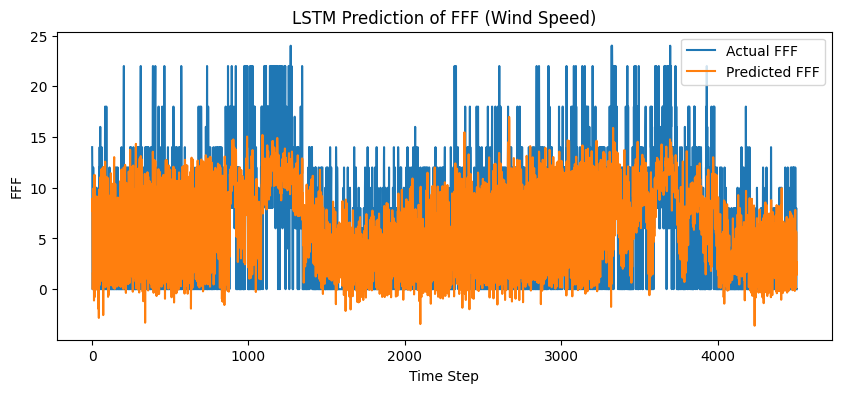

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Inverse scale (optional, if you saved scalers)
# Example only for y — because it was scaled with all features
fff_index = scaled_df.columns.get_loc('FFF')
fff_min = scaler.data_min_[fff_index]
fff_max = scaler.data_max_[fff_index]
y_pred_unscaled = y_pred * (fff_max - fff_min) + fff_min
y_test_unscaled = y_test * (fff_max - fff_min) + fff_min

# Plot predictions
plt.figure(figsize=(10, 4))
plt.plot(y_test_unscaled, label='Actual FFF')
plt.plot(y_pred_unscaled, label='Predicted FFF')
plt.title('LSTM Prediction of FFF (Wind Speed)')
plt.xlabel('Time Step')
plt.ylabel('FFF')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}")

r2 = r2_score(y_test_unscaled, y_pred_unscaled)
print(f"R² Score: {r2:.4f}")


MAE: 3.46, MSE: 20.93
R² Score: 0.4391


In [ ]:
import os
import matplotlib.pyplot as plt
from datetime import datetime

# Directory for saving plots and CSV
output_dir = "plot"
os.makedirs(output_dir, exist_ok=True)

timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [ ]:
import pandas as pd

# Replace with actual best values from your GWO
result = {
    "Timestamp": timestamp,
    "Units": unit_sizee,
    "Dropout": dropoutt,
    "Batch Size":batch_sizee,
    "Learning Rate":learning_ratee,
    "Num Layers":num_layerss,
    "Lookback":lookbackk,
    "MAE": mae,
    "MSE": mse,
    "R2":r2
}

csv_path = os.path.join(output_dir, "history.csv")

# Append to CSV
if os.path.exists(csv_path):
    df_existing = pd.read_csv(csv_path)
    df_existing = pd.concat([df_existing, pd.DataFrame([result])], ignore_index=True)
    df_existing.to_csv(csv_path, index=False)
else:
    pd.DataFrame([result]).to_csv(csv_path, index=False)

print(f"Results appended to CSV: {csv_path}")


Results appended to CSV: plot/history.csv
